<a href="https://colab.research.google.com/github/waleedraf51/Bootcamp2020/blob/master/Reuters%20completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras import models,layers,optimizers,utils
import numpy as np
import matplotlib.pyplot as plt


In [4]:
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [5]:
print(len(train_data))
print(len(test_data))

8982
2246


In [6]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [7]:
def vectorize_sequences(sequences, dimension=10000):
  results=np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results [i, sequence]=1.
    return results

In [8]:
X_train=vectorize_sequences(train_data)
X_test=vectorize_sequences(test_data)

In [9]:
def to_one_hot(labels, dimension=46):
  results=np.zeros((len(labels),dimension))
  for i, labels in enumerate(labels):
    results [i, labels]=1.
    return results

In [10]:
one_hot_train_labels=to_one_hot(train_labels)
one_hot_test_labels=to_one_hot(test_labels)

In [11]:
one_hot_train_labels=utils.to_categorical(train_labels)
one_hot_test_labels=utils.to_categorical(test_labels)

In [12]:
X_val=X_train[:1000]
partial_X_train=X_train[1000:]
Y_val=one_hot_train_labels[:1000]
partial_Y_train=one_hot_train_labels[1000:]

In [13]:
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [24]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])
history= model.fit(partial_X_train, partial_Y_train, epochs=20, batch_size=512,validation_data=(X_val,Y_val))


Epoch 1/20
16/16 [==============================] - 1s 57ms/step - loss: 3.4265 - accuracy: 0.3514 - val_loss: 3.4154 - val_accuracy: 0.3530
Epoch 2/20
16/16 [==============================] - 1s 46ms/step - loss: 3.4064 - accuracy: 0.3514 - val_loss: 3.3977 - val_accuracy: 0.3530
Epoch 3/20
16/16 [==============================] - 1s 48ms/step - loss: 3.3891 - accuracy: 0.3514 - val_loss: 3.3809 - val_accuracy: 0.3530
Epoch 4/20
16/16 [==============================] - 1s 47ms/step - loss: 3.3724 - accuracy: 0.3514 - val_loss: 3.3642 - val_accuracy: 0.3540
Epoch 5/20
16/16 [==============================] - 1s 47ms/step - loss: 3.3559 - accuracy: 0.3514 - val_loss: 3.3478 - val_accuracy: 0.3540
Epoch 6/20
16/16 [==============================] - 1s 46ms/step - loss: 3.3395 - accuracy: 0.3514 - val_loss: 3.3315 - val_accuracy: 0.3540
Epoch 7/20
16/16 [==============================] - 1s 47ms/step - loss: 3.3233 - accuracy: 0.3514 - val_loss: 3.3153 - val_accuracy: 0.3540
Epoch 8/20
16

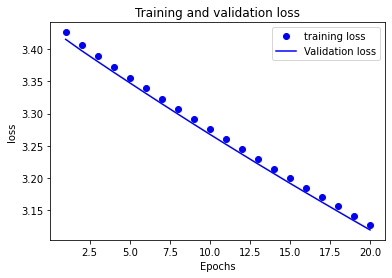

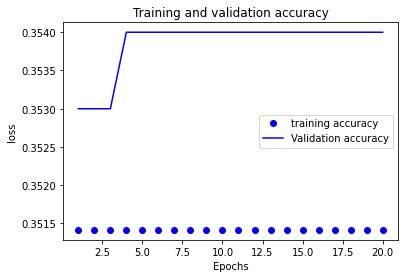

<Figure size 432x288 with 0 Axes>

In [58]:
histroy_dict= history.history
loss_values=histroy_dict['loss']
val_loss_values=histroy_dict['val_loss']
epochs= range(1,len(loss_values) +1)
plt.plot(epochs,loss_values,'bo', label='training loss')
plt.plot(epochs,val_loss_values,'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.clf()
accuracy_value=histroy_dict['accuracy']
value_accuracy_values=histroy_dict['val_accuracy']
plt.plot(epochs,accuracy_value,'bo', label='training accuracy')
plt.plot(epochs,value_accuracy_values,'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.clf()

In [59]:
prediction=model.predict(X_test)

In [61]:
prediction.shape

(2246, 46)

In [64]:
prediction[0].sum()

1.0

In [ ]:
prediction[1].sum()